In [1]:
import numpy as np
import pandas as pd
from utils import *

In [2]:
features, labels, handles = initial_processing("default_of_credit_card_clients.xls")
print(features.shape)
print(labels.shape)
print(handles)

(30000, 23)
(30000,)
X1     LIMIT_BAL
X2           SEX
X3     EDUCATION
X4      MARRIAGE
X5           AGE
X6         PAY_0
X7         PAY_2
X8         PAY_3
X9         PAY_4
X10        PAY_5
X11        PAY_6
X12    BILL_AMT1
X13    BILL_AMT2
X14    BILL_AMT3
X15    BILL_AMT4
X16    BILL_AMT5
X17    BILL_AMT6
X18     PAY_AMT1
X19     PAY_AMT2
X20     PAY_AMT3
X21     PAY_AMT4
X22     PAY_AMT5
X23     PAY_AMT6
Name: 0, dtype: object


In [3]:
cov_features, λ_vals, λ_vecs = compute_λ_cov(features)
cov_features.shape

(23, 23)

In [4]:
kruskal_wallis(features, labels)

[316882.17179023515,
 316882.17179023515,
 316881.98191684583,
 316879.4864433021,
 316882.17179023515,
 35569.82624903051,
 13407.323102632216,
 12002.732964986899,
 6437.730243975186,
 3334.6135888420217,
 5142.0725267210955,
 311118.8244506829,
 308229.96386910934,
 306125.60726887657,
 303885.8002506753,
 301796.3228245665,
 297569.18051066884,
 292455.8155431558,
 291098.0494786854,
 285491.7693617937,
 280837.1972797292,
 277554.43448199594,
 272062.83086895145]

In [5]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([23364,  6636]))

In [6]:
redundancy_check(features, 0.90, labels)

array([[2.0000e+04, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2000e+05, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [9.0000e+04, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [3.0000e+04, 1.0000e+00, 2.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [8.0000e+04, 1.0000e+00, 3.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [5.0000e+04, 1.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

In [7]:
mdc_euclidean(features, labels) #As expected bigger ω1 wrong as dataset is unbalanced (Euclidean)

(0.07296666666666667, 0.39076666666666665, 0.46373333333333333)

In [8]:
mcd_mahalanobis(features, labels) #Better

(0.08096666666666667, 0.22043333333333334, 0.3014)

In [9]:
print(PCA(features, kaiser).shape)
PCA(features, kaiser) #Seems to be working

(30000, 6)


array([[-1.88796243, -0.90610864,  0.48779485,  0.54001512,  0.99795729,
         0.0444039 ],
       [-0.76469577, -2.10928757, -1.0973135 ,  0.48347978,  0.85898024,
        -0.23509848],
       [-0.8474079 , -1.07217896, -0.4121783 ,  0.4335639 ,  0.77049273,
         0.01866504],
       ...,
       [ 0.35745734, -3.31275482, -0.61074083, -0.47070134, -1.23310079,
         0.73744741],
       [ 0.65055188,  0.72290076, -0.52268173, -2.88382384, -0.24286323,
         1.61520693],
       [-0.14556441, -0.80975135,  1.32405316, -0.90223955, -1.05636005,
         0.45503498]])

In [3]:
run(features, labels, 10, classifier = "mahalanobis")

Training error: 0.30151904761904763 ± 0.00307800698246884
Testing error: 0.20212592592592596 ± 0.09208367876962563


In [4]:
run(features, labels, 10, classifier = "euclidean")

Training error: 0.46395714285714285 ± 0.0021182127836516804
Testing error: 0.3094962962962963 ± 0.16971426175993223


In [3]:
run(PCA(redundancy_check(features, 0.95, labels), kaiser), labels, 10, classifier = "euclidean")

Training error: 0.363052380952381 ± 0.0033969741103776346
Testing error: 0.23969629629629627 ± 0.11845549921774233


In [4]:
run(PCA(redundancy_check(features, 0.95, labels), kaiser), labels, 10, classifier = "mahalanobis") #Worse

Training error: 0.35306666666666664 ± 0.004471892566828022
Testing error: 0.23623703703703702 ± 0.11474051861394467


/home/fibra/Desktop/testing/RP_project/utils.py:436: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"For {handles[i]}:")
/home/fibra/Desktop/testing/RP_project/utils.py:443: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"Feature {handles[i]}")


For LIMIT_BAL:
Not normally distributed; rejected H0.


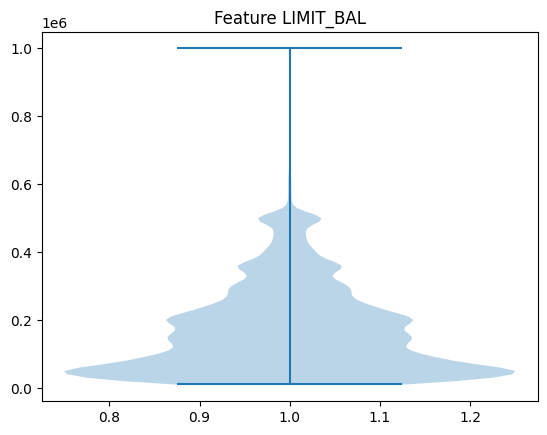

For SEX:
Not normally distributed; rejected H0.


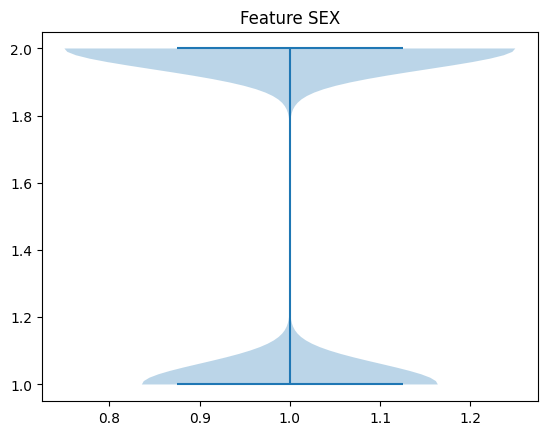

For EDUCATION:
Not normally distributed; rejected H0.


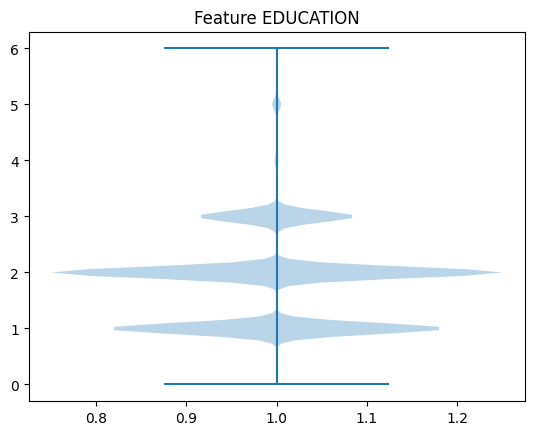

For MARRIAGE:
Not normally distributed; rejected H0.


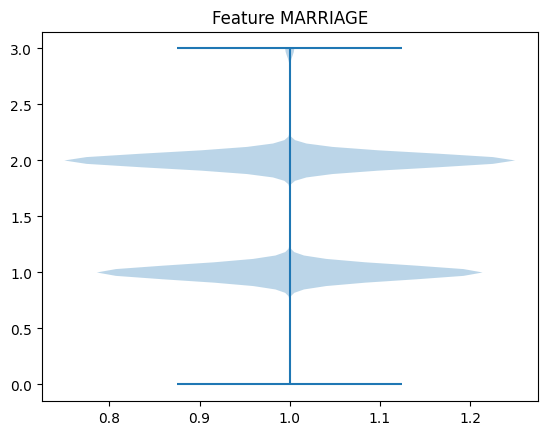

For AGE:
Not normally distributed; rejected H0.


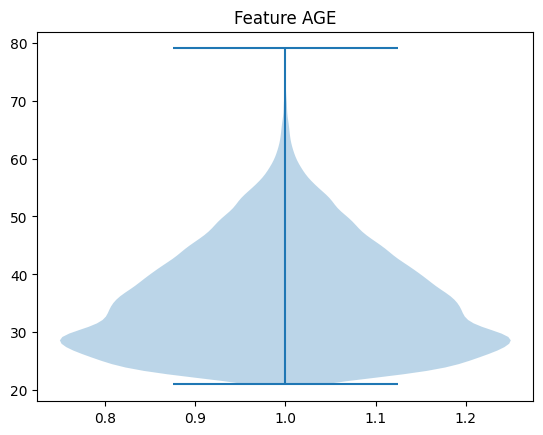

For PAY_0:
Not normally distributed; rejected H0.


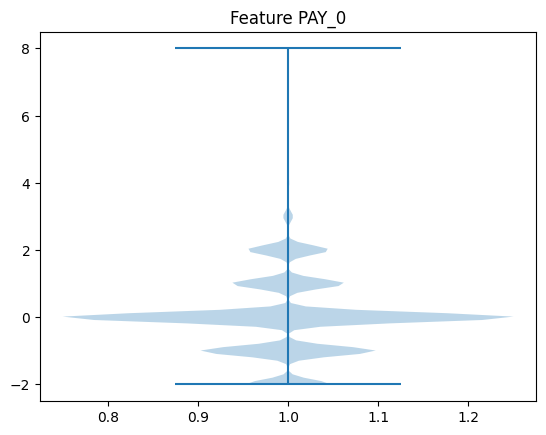

For PAY_2:
Not normally distributed; rejected H0.


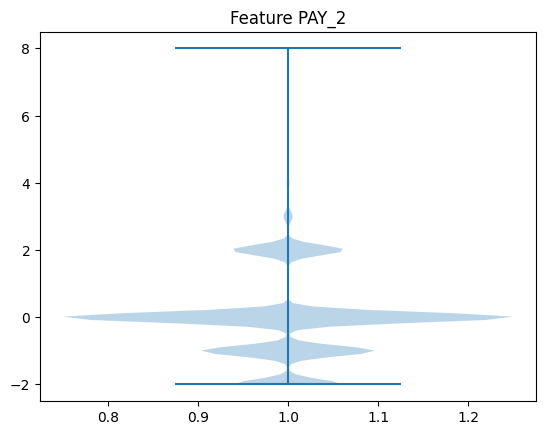

For PAY_3:
Not normally distributed; rejected H0.


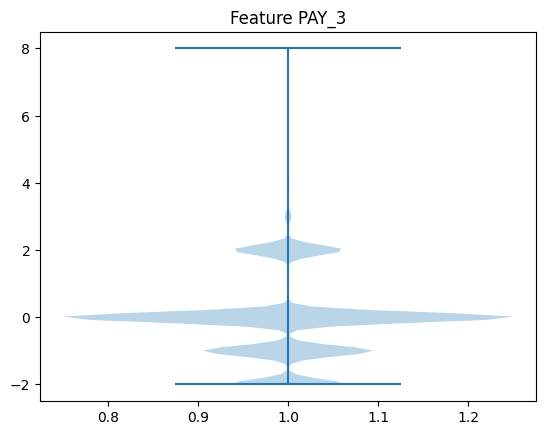

For PAY_4:
Not normally distributed; rejected H0.


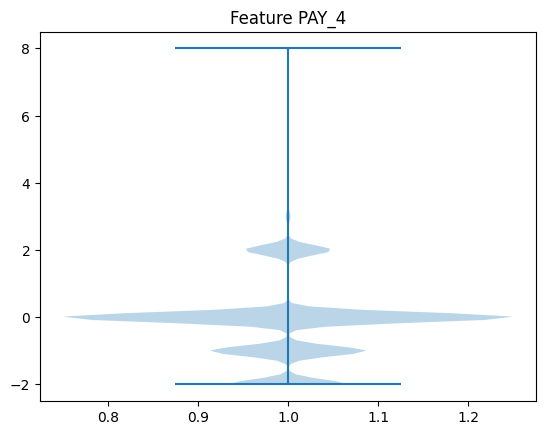

For PAY_5:
Not normally distributed; rejected H0.


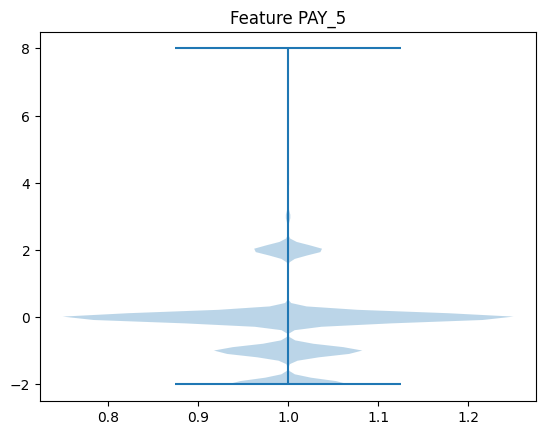

For PAY_6:
Not normally distributed; rejected H0.


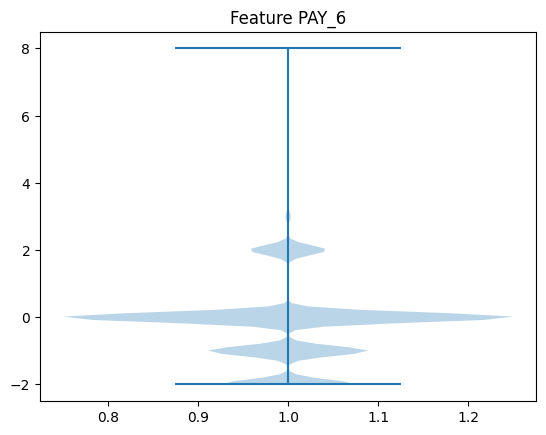

For BILL_AMT1:
Not normally distributed; rejected H0.


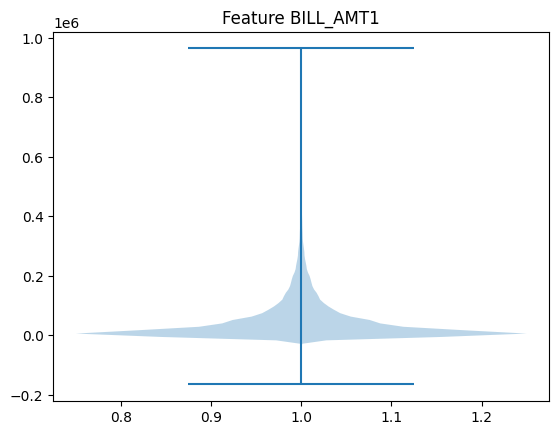

For BILL_AMT2:
Not normally distributed; rejected H0.


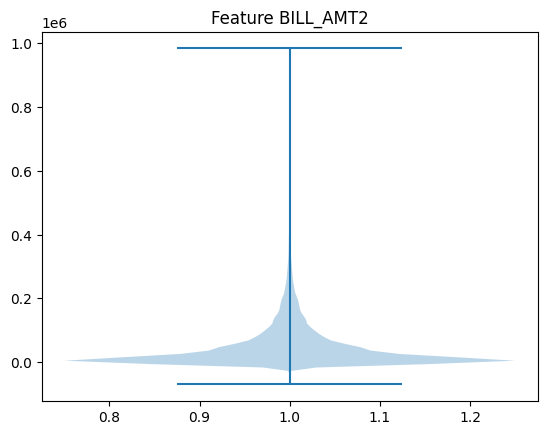

For BILL_AMT3:
Not normally distributed; rejected H0.


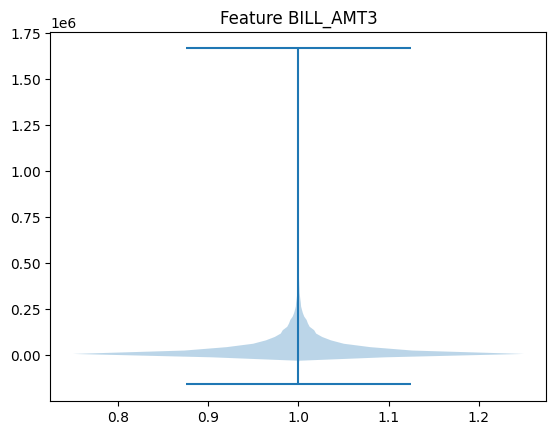

For BILL_AMT4:
Not normally distributed; rejected H0.


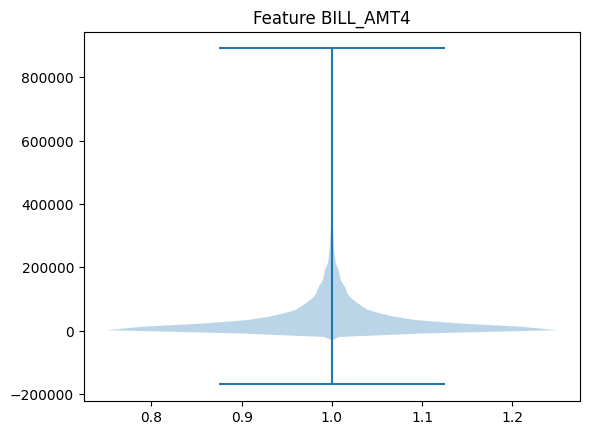

For BILL_AMT5:
Not normally distributed; rejected H0.


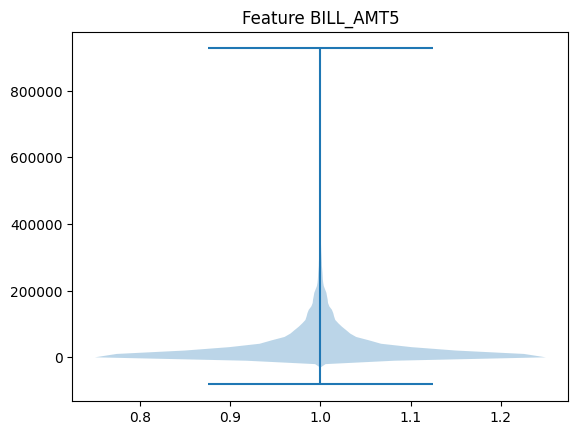

For BILL_AMT6:
Not normally distributed; rejected H0.


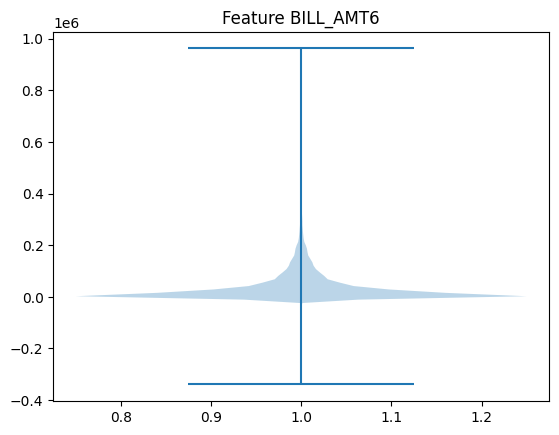

For PAY_AMT1:
Not normally distributed; rejected H0.


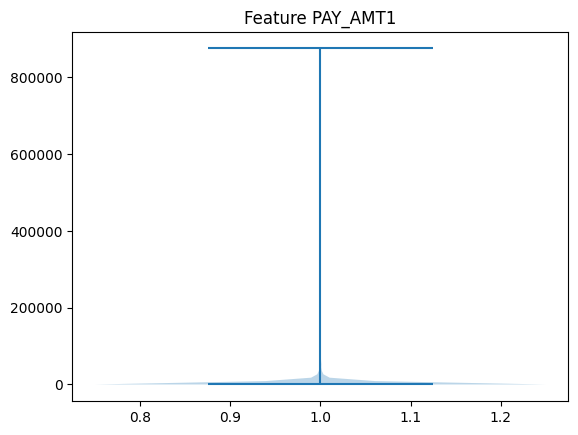

For PAY_AMT2:
Not normally distributed; rejected H0.


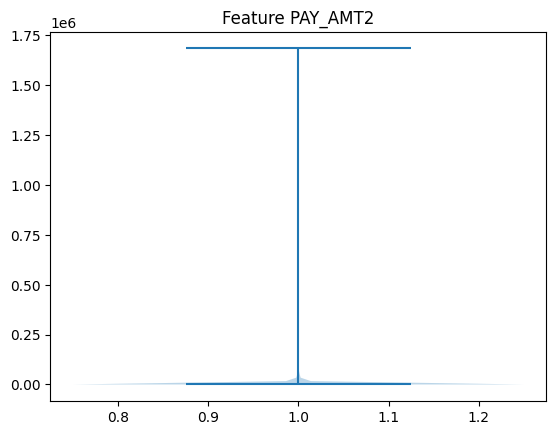

For PAY_AMT3:
Not normally distributed; rejected H0.


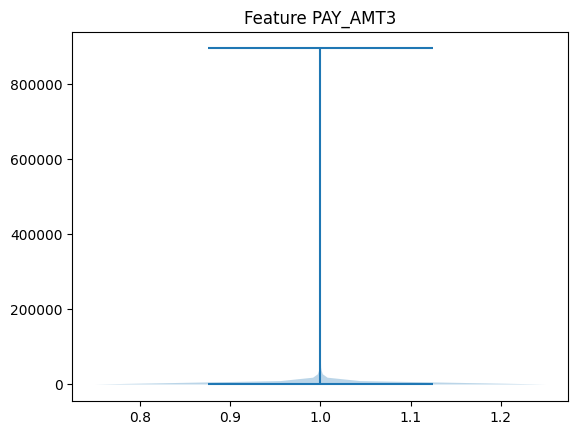

For PAY_AMT4:
Not normally distributed; rejected H0.


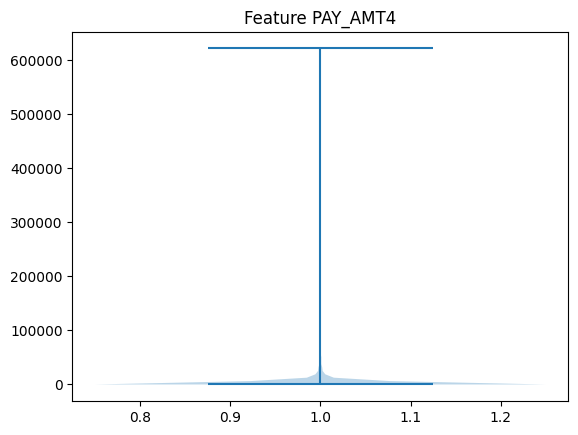

For PAY_AMT5:
Not normally distributed; rejected H0.


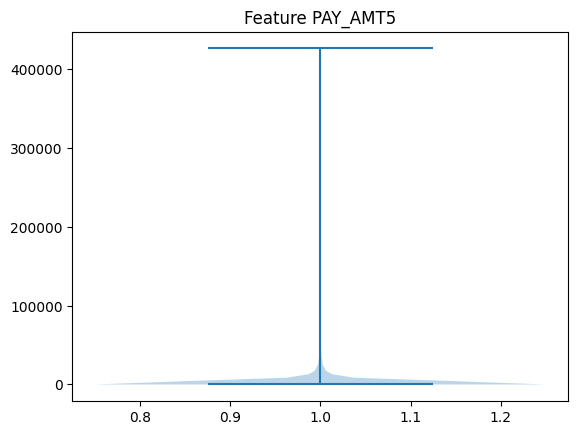

For PAY_AMT6:
Not normally distributed; rejected H0.


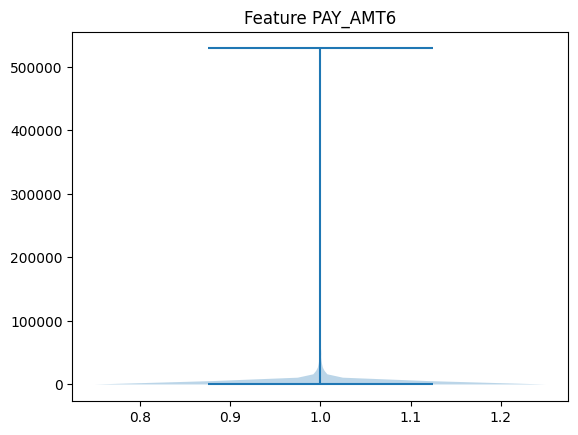

In [3]:
normality_check(features, handles, 0.05)